## Adult Income DataSet - Mini Project

### Data Cleaning

#### Load Libraries

In [24]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import os

In [2]:
adult = pd.read_csv('adult.csv')

In [3]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Pandas has a function called .isnull() that returns True if an item has no value (None) or returns False for each item in a data frame. The result is shown below:

In [5]:
adult.isnull().head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Number of Missing Values By Column

In [6]:
missing = pd.concat([adult.isnull().sum(), 100 * adult.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
educational-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
gender,0,0.0


#### Remove Nulls

In [8]:
for column in adult.columns:
  null_count = len(adult[adult[column].isna()])
  print("{} : {}".format(column, null_count))

age : 0
workclass : 0
fnlwgt : 0
education : 0
educational-num : 0
marital-status : 0
occupation : 0
relationship : 0
race : 0
gender : 0
capital-gain : 0
capital-loss : 0
hours-per-week : 0
native-country : 0
income : 0


#### Examine and inspect categorical features

In [9]:
#Examine datatype to mark which data type will play a role in model
adult.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

#### Use IQR rule to identify potential outliers

In [11]:
stat = adult.age.describe()
print(stat)
IQR = stat['75%']-stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] - 1.5 * IQR
print('The upper an lower bounds for suspected outliers are {} and {}.'.format(upper, lower))


count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64
The upper an lower bounds for suspected outliers are 78.0 and -2.0.


#### Examine potential outlier below lower bound

In [106]:
#check potential outlier below lower bound
adult[adult.age < 17]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


#### Examine potential outier above the bound

In [108]:
#check potential outlier above upper bound
adult.loc[adult.age > 90, 'education'].value_counts()

Series([], Name: education, dtype: int64)

#### Crosstab race and gender columns via percentage

In [19]:
pd.crosstab(adult.race, adult.gender)/len(adult)

gender,Female,Male
race,,
Amer-Indian-Eskimo,0.003788,0.005835
Asian-Pac-Islander,0.010585,0.020515
Black,0.047254,0.048667
Other,0.003173,0.005139
White,0.266717,0.588326


Majority of this data is white male and female

#### Data Definition - (Take a deeper look at the data)

In [20]:
#Call the info method on adult to see a summary of the data.info 
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [21]:
adult.select_dtypes('object')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [22]:
adult.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### Examine who is making over 50K

In [33]:
adult_age = adult.loc[(adult.age) & (adult.income == '>50K')]

In [34]:
adult_age.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
15,43,Private,346189,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
25,45,Self-emp-not-inc,432824,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,90,United-States,>50K
40,65,Private,136384,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K


White Male's with a min of a High School diploma makes over the age of 40 make the highest income.

### Examine female Salary

In [35]:
adult_fm = adult.loc[(adult.age) & (adult.gender == 'Female')]

In [36]:
adult_fm.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
17,43,Private,128354,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,30,United-States,<=50K
18,37,Private,60548,HS-grad,9,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,20,United-States,<=50K
52,21,Private,214399,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,1721,24,United-States,<=50K
55,21,Private,110677,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
63,33,Private,281384,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Female,0,0,40,United-States,<=50K


### Examine Male Salary over 40 years old

In [109]:
adult_m = adult.loc[(adult.age) & (adult.gender == 'Male') & (adult.age >=40)]

In [110]:
adult_m.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
15,43,Private,346189,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
25,45,Self-emp-not-inc,432824,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,90,United-States,>50K


### Examine Masters Degree

In [39]:
adult_edu = adult.loc[(adult.age) & (adult.education == 'Masters')]

In [40]:
adult_edu.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
15,43,Private,346189,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
40,65,Private,136384,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
89,41,?,38434,Masters,14,Married-civ-spouse,?,Wife,White,Female,7688,0,10,United-States,>50K
92,33,Private,176410,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,5178,0,10,United-States,>50K
129,41,Private,239296,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,50,United-States,>50K


### Examine Education equal to High School Diploma and less

In [111]:
adult_edu2 = adult.loc[(adult.age) & (adult.education != 'Masters') & (adult.education != 'Prof-school')]

In [112]:
adult_edu2.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
17,43,Private,128354,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,30,United-States,<=50K


### Data Visualization

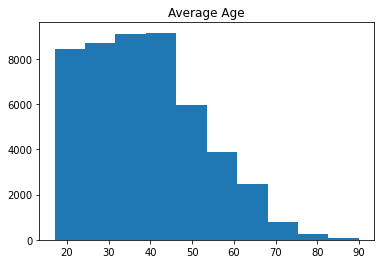

In [55]:
plt.hist(adult.age)
plt.title("Average Age")
plt.show()

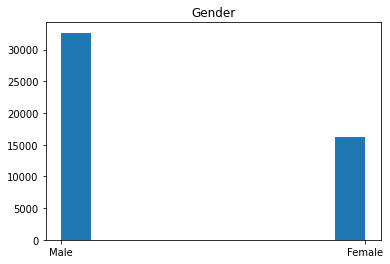

In [60]:
plt.hist(adult.gender)
plt.title("Gender")
plt.show()

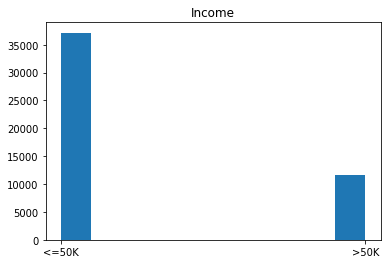

In [64]:
plt.hist(adult.income)
plt.title("Income")
plt.show()

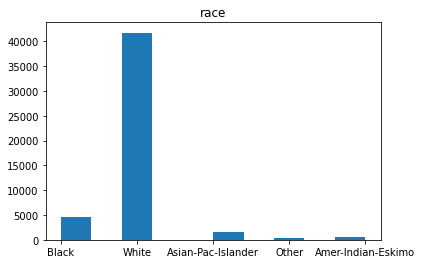

In [63]:
plt.hist(adult.race)
plt.title("race")
plt.show()

In [70]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


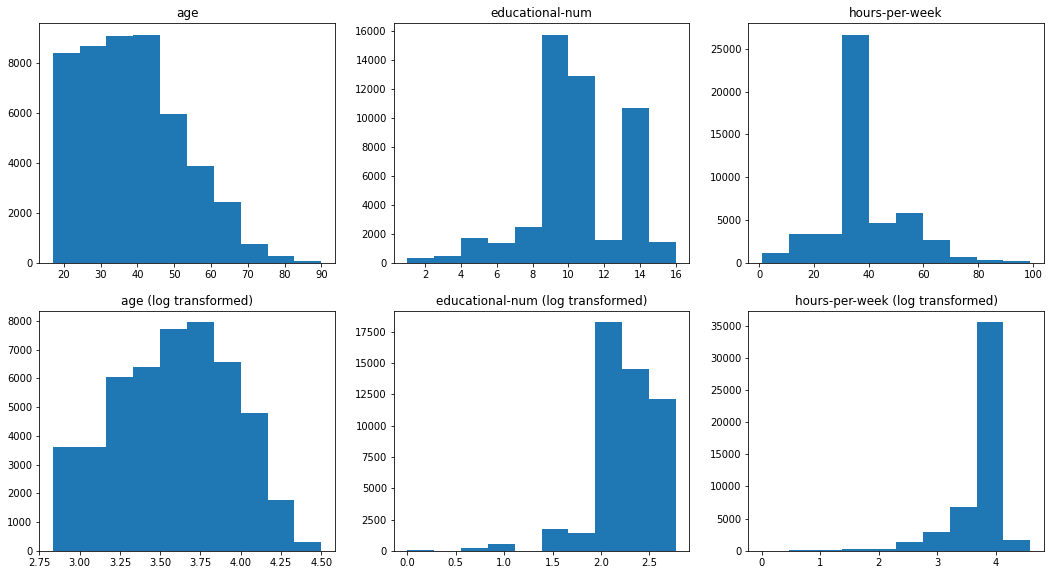

In [71]:
plt.figure(figsize=(18,15))

variables = ['age', 'educational-num' , 'hours-per-week']

for i in range(3):
    plt.subplot(3, 3, i+1)
    plt.hist(adult[variables[i]])
    plt.title(variables[i])

    
for i in range(3):
    plt.subplot(3, 3, i+4)
    plt.hist(np.log(adult[variables[i]]))
    plt.title(variables[i] + ' (log transformed)')

In [80]:
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Age / Education in Descending Order

In [99]:
sort_order = adult[["education","age"]].groupby("education").mean().sort_values(by = "age", ascending=False).reset_index().education.values

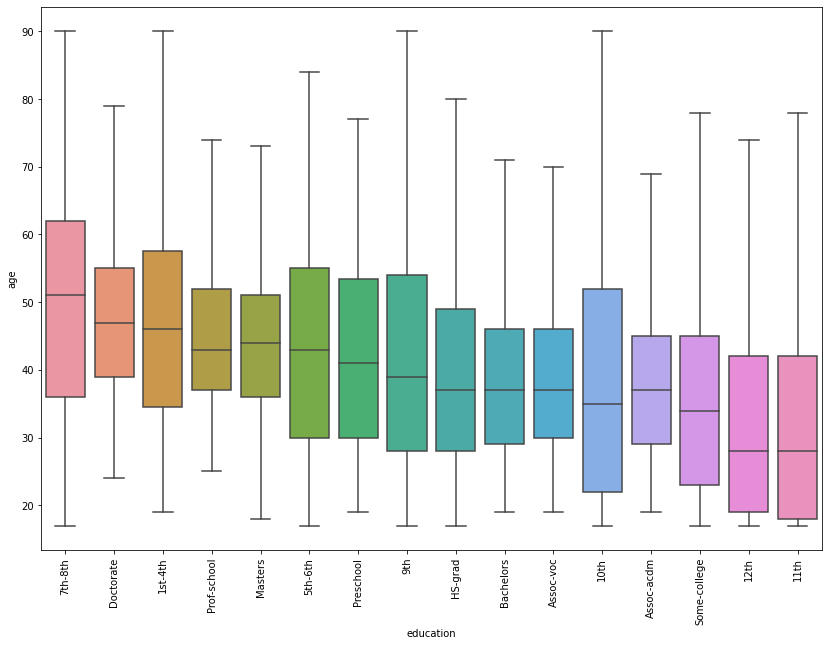

In [101]:
plt.subplots(figsize=(14, 10))
sns.boxplot(x='education', y='age', data=adult, order=sort_order, showfliers=False)
plt.xticks(rotation='vertical')
plt.ylabel('age')
plt.xlabel('education');

#### Race / Years of Education in Descending Order¶


In [124]:
sort_order = adult[["race","educational-num"]].groupby("race").mean().sort_values(by = "educational-num", ascending=False).reset_index().race.values

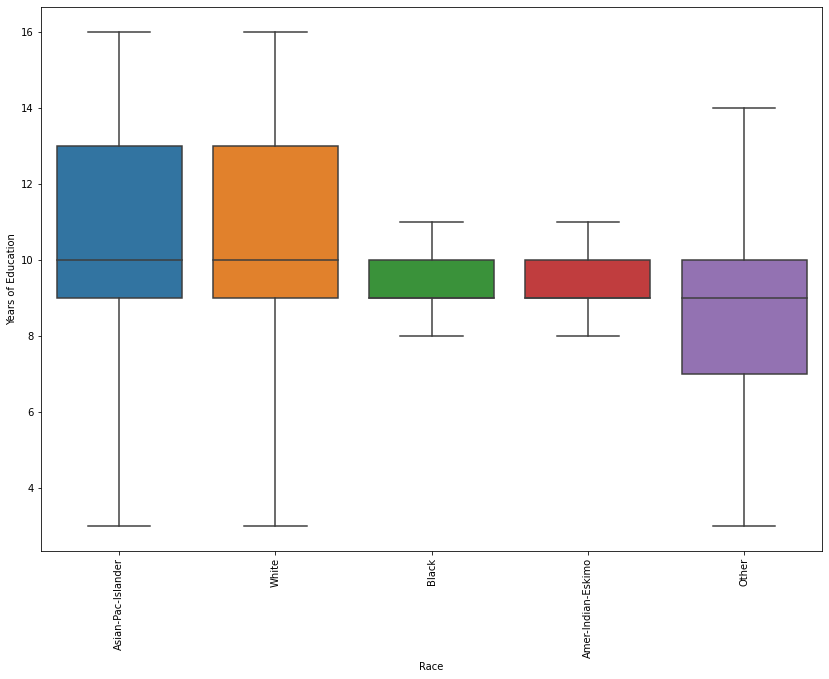

In [126]:
plt.subplots(figsize=(14, 10))
sns.boxplot(x='race', y='educational-num', data=adult, order=sort_order, showfliers=False)
plt.xticks(rotation='vertical')
plt.ylabel('Years of Education')
plt.xlabel('Race');